In [119]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import numpy as np
import matplotlib.pyplot as plt
import statistics

stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

In [120]:
os.chdir('E:/Rampen/Models/sliding')
list_models = sorted(glob.glob('*.w2v'))
list_models

['sliding-model-1750-1765.w2v',
 'sliding-model-1751-1766.w2v',
 'sliding-model-1752-1767.w2v',
 'sliding-model-1753-1768.w2v',
 'sliding-model-1754-1769.w2v',
 'sliding-model-1755-1770.w2v',
 'sliding-model-1756-1771.w2v',
 'sliding-model-1757-1772.w2v',
 'sliding-model-1758-1773.w2v',
 'sliding-model-1759-1774.w2v',
 'sliding-model-1760-1775.w2v',
 'sliding-model-1761-1776.w2v',
 'sliding-model-1762-1777.w2v',
 'sliding-model-1763-1778.w2v',
 'sliding-model-1764-1779.w2v',
 'sliding-model-1765-1780.w2v',
 'sliding-model-1766-1781.w2v',
 'sliding-model-1767-1782.w2v',
 'sliding-model-1768-1783.w2v',
 'sliding-model-1769-1784.w2v',
 'sliding-model-1770-1785.w2v',
 'sliding-model-1771-1786.w2v',
 'sliding-model-1772-1787.w2v',
 'sliding-model-1773-1788.w2v',
 'sliding-model-1774-1789.w2v',
 'sliding-model-1775-1790.w2v',
 'sliding-model-1776-1791.w2v',
 'sliding-model-1777-1792.w2v',
 'sliding-model-1778-1793.w2v',
 'sliding-model-1779-1794.w2v',
 'sliding-model-1780-1795.w2v',
 'slidin

In [125]:
os.chdir('E:/Rampen/text')
l = sorted(glob.glob('*articles*'))

In [163]:
def MSD(year, list_keywords1,list_keywords2):
    os.chdir('E:/Rampen/Models/sliding')
    
    #if year < 1831:
    #    model = KeyedVectors.load([m for m in list_models if m[14:18] == str(year -7)][0])
    #else:
    #    model = KeyedVectors.load('sliding-model-1830-1845.w2v')
    
    if year < 1780:
        model = KeyedVectors.load(list_models[0])
    if year > 1779 and year < 1810:
        model = KeyedVectors.load(list_models[1])
    if year > 1809 and year < 1830:
        model = KeyedVectors.load(list_models[2])
    if year > 1829:
        model = KeyedVectors.load(list_models[3])
    os.chdir('E:/Rampen/text')
    
    fn = str(year) + "articles.txt"
    with open(fn,'r',encoding='utf-8') as f:
        lines = f.readlines()
    
    list1_average = np.average(model[[w for w in list_keywords1 if w in model.wv.vocab]], axis=0)
    model.add('vector_list1',list1_average,replace=False)
    
    list2_average = np.average(model[[w for w in list_keywords2 if w in model.wv.vocab]], axis=0)
    model.add('vector_list2',list2_average,replace=False)
    
    lines = [l.split(' ') for l in lines]
    types = list(set([item for sublist in lines for item in sublist if item in model.wv.vocab]))
    
    words_close1 = [w for w in types if model.similarity("vector_list1",w) > 0.5]
    print("length list 1 = {}".format(len(words_close1)))
    #print(" ".join(words_close1))
    
    words_close2 = [w for w in types if model.similarity("vector_list2",w) > 0.5]
    print("length list 2 = {}".format(len(words_close2)))
    #print(" ".join(words_close2))
    
    lines = [l for l in lines if any(word in l for word in list_keywords1)] #word_close1 for vector shizzle
    print(len(lines))
    #return lines
    
    l = []
    for line in lines:
        
        for index_keyword in [c for c,i in enumerate(line) if i in list_keywords1]:
            next_word = line[index_keyword + 1]
            
            if next_word in model.wv.vocab and model.similarity(next_word,'vector_list2') > 0.6:
                print(" ".join(line[index_keyword:index_keyword + 2]))
                l.append(" ".join(line[index_keyword:index_keyword + 2]))
    return l

In [128]:
list1 = ["algemeen","algemeene","algemeenen","algemene","algemenen","publieke","publiek","publieken","publyk","publyken","publyke","nationaal","nationale","openbare","openbaren","openbaare","openbaaren","openbaar"]

In [164]:
l = []

for i in range(1750,1851):
    print(i)
    l.append(MSD(i,list1,list2))

1750


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


length list 1 = 22
length list 2 = 168
235
1751


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


length list 1 = 22
length list 2 = 174
312
1752
length list 1 = 23
length list 2 = 170
270
1753
length list 1 = 26
length list 2 = 175
352
1754
length list 1 = 24
length list 2 = 176
351
1755
length list 1 = 22
length list 2 = 176
421
algemenen ramp
1756
length list 1 = 25
length list 2 = 175
429
1757
length list 1 = 27
length list 2 = 177
421
algemeene ramp
1758
length list 1 = 27
length list 2 = 174
559
algemeene fchrik
1759
length list 1 = 27
length list 2 = 176
611
algemene ramp
algemeene elende
1760
length list 1 = 27
length list 2 = 175
642
algemeene verwarring
1761
length list 1 = 27
length list 2 = 176
657
1762
length list 1 = 27
length list 2 = 175
669
1763
length list 1 = 27
length list 2 = 177
849
algemeene ramp
1764
length list 1 = 27
length list 2 = 177
976
algemeene rampen
algemeene fchrik
1765
length list 1 = 26
length list 2 = 177
946
1766
length list 1 = 26
length list 2 = 174
931
algemeene elende
1767
length list 1 = 27
length list 2 = 177
1053
algemene rampen
1768
le

1833
length list 1 = 7
length list 2 = 46
4511
1834
length list 1 = 8
length list 2 = 45
4545
algemeene ramp
1835
length list 1 = 9
length list 2 = 44
4402
algemeenen ramp
nationale rampen
nationale rampen
1836
length list 1 = 9
length list 2 = 47
4697
openbare ramp
algemeene bekommering
algemeene ramp
openbare ramp
algemeene onheilen
algemeene rampen
1837
length list 1 = 8
length list 2 = 45
4813
algemeene ramp
algemeene ramp
algemeene rampen
1838
length list 1 = 8
length list 2 = 44
4340
nationale ramp
algemeene ramp
nationale ramp
algemeenen ramp
nationale ramp
1839
length list 1 = 8
length list 2 = 43
5089
1840
length list 1 = 8
length list 2 = 45
7067
algemeene gevolgen
algemeene ramp
algemeene ramp
algemeene ramp
openbare rampen
algemeene rampen
1841
length list 1 = 8
length list 2 = 46
5490
algemeene ramp
algemeene rampen
algemeene rampen
openbare ramp
openbare ramp
openbare rampen
algemeene rampen
algemeene bekommering
1842
length list 1 = 8
length list 2 = 45
5357
algemeene ra

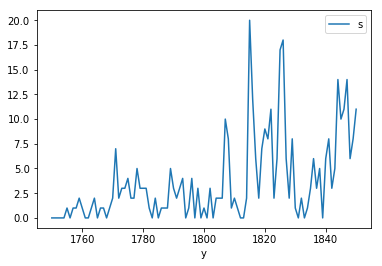

In [165]:
t = pd.DataFrame([[len(li) for li in l],list(range(1750,1851))]).T
t.columns = ["s","y"]
t.plot(x="y",y="s")

In [115]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [118]:
t.iloc[40:,:]

,s,y
40,3,1790
41,3,1791
42,4,1792
43,4,1793
44,0,1794
45,3,1795
46,4,1796
47,0,1797
48,3,1798
49,5,1799


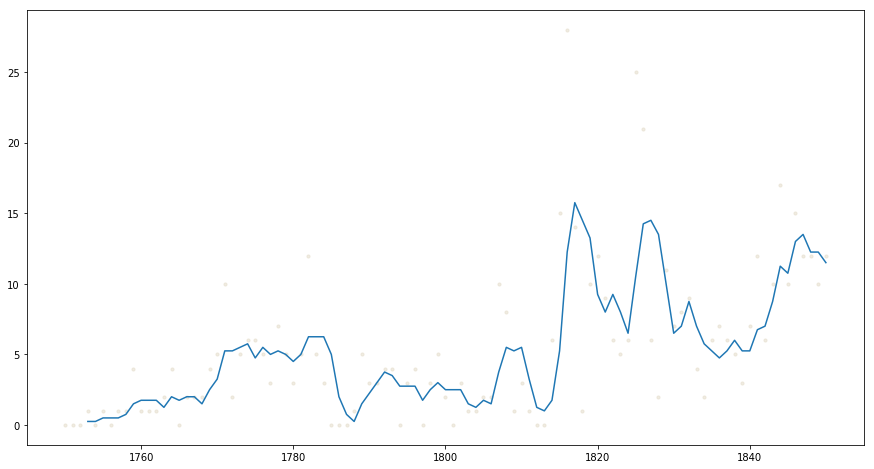

In [116]:
x_values = t['y']
y_values = t['s']

color_point = "grey"
rm = t['s'].rolling(window=4).mean()
plt.figure(figsize=(15,8))

mpl_fig = plt.scatter(x = x_values, y = y_values, c = color_point, s = 10, alpha = 0.5)
mpl_fig.set_facecolor("#e2dac6")

#plt.ylim(bottom=0, top=0.00009)
plt.plot(x_values, rm)
#plt.savefig("het_buitenland_relfreq_poster.png", format = 'png', dpi = 800)
plt.show()

In [105]:
Counter([item for sublist in l for item in sublist]).most_common(15)

[('algemeene ramp', 100),
 ('algemeene verwarring', 100),
 ('algemeene rampen', 46),
 ('algemeenen schrik', 45),
 ('algemeene verwoesting', 44),
 ('algemeenen ramp', 29),
 ('algemeene verflagenheid', 25),
 ('nationale ramp', 25),
 ('algemeene schrik', 24),
 ('algemeene fchrik', 22),
 ('algemeene bekommering', 17),
 ('algemeenen fchrik', 14),
 ('algemeen veroorzaakt', 11),
 ('nationale rampen', 11),
 ('openbare rampen', 11)]

In [107]:
model.most_similar('nationale')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nationaale', 0.8705902099609375),
 ('vermeerdering', 0.6707247495651245),
 ('augmentatie', 0.642699122428894),
 ('pennoenen', 0.6231459975242615),
 ('militie', 0.6112417578697205),
 ('soldy', 0.6073751449584961),
 ('jaarwedden', 0.6068285703659058),
 ('geaccordeerde', 0.6044041514396667),
 ('subfidie', 0.6010459661483765),
 ('vermindering', 0.5909786820411682)]